## House Prices: Advanced Regression Techniques

In [3]:
from pycaret.regression import *
import pandas as pd

In [4]:
df = pd.read_csv('train.csv')
pd.options.display.max_columns = 500
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [10]:
df.select_dtypes(exclude="object").columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [14]:
exp_reg = setup(df, target='SalePrice', numeric_features=['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold'])

,Description,Value
0,session_id,5577
1,Target,SalePrice
2,Original Data,"(1460, 81)"
3,Missing Values,True
4,Numeric Features,37
5,Categorical Features,43
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(1021, 288)"


In [15]:
compare_models(sort='RMSE', exclude=['tr'])

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,16653.4237,1.178415e+09,30487.0875,0.7582,0.1383,0.0980,0.569
lightgbm,Light Gradient Boosting Machine,17449.4603,1.064289e+09,30719.3736,0.7980,0.1435,0.1010,0.246
rf,Random Forest Regressor,18284.8874,1.142623e+09,31858.8265,0.7819,0.1537,0.1093,1.980
et,Extra Trees Regressor,18597.9162,1.196983e+09,32898.1518,0.7799,0.1551,0.1096,2.054
omp,Orthogonal Matching Pursuit,18768.3446,1.399000e+09,34364.8786,0.7128,0.1935,0.1109,0.037
ridge,Ridge Regression,19407.8075,1.555511e+09,35022.4344,0.6738,0.1918,0.1159,0.058
ada,AdaBoost Regressor,24046.1053,1.508463e+09,37462.6741,0.7176,0.2034,0.1577,0.393
llar,Lasso Least Angle Regression,19561.0129,1.739874e+09,38123.7954,0.6838,0.2196,0.1146,0.418
en,Elastic Net,20215.4103,1.837633e+09,38317.4721,0.6310,0.1694,0.1164,0.167
lasso,Lasso Regression,19752.2586,1.911828e+09,39076.2438,0.6846,0.2027,0.1155,0.136


GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=5577, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [16]:
GBM = create_model('lightgbm', verbose=False)
GBR = create_model('gbr', verbose=False)
RF = create_model('rf', verbose=False)

In [17]:
tuned_GBM = tune_model(GBM, optimize='RMSE')
tuned_GBR = tune_model(GBR, optimize='RMSE')
tuned_RF = tune_model(RF, optimize='RMSE')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,15098.7647,4.870302e+08,22068.7609,0.8844,0.1135,0.0836
1,13773.1347,3.860859e+08,19649.0678,0.8787,0.1427,0.1016
2,19110.5920,7.580592e+08,27532.8756,0.8515,0.1393,0.1029
3,20203.9407,1.078238e+09,32836.5338,0.8714,0.1772,0.1252
4,22482.9633,3.565622e+09,59712.8313,0.0869,0.2040,0.1319
5,18072.0417,1.350482e+09,36748.9067,0.7986,0.1559,0.1058
6,20781.1003,1.157338e+09,34019.6673,0.8442,0.1814,0.1298
7,20305.9568,1.475108e+09,38407.1405,0.8645,0.1423,0.1013
8,18676.0173,8.293705e+08,28798.7941,0.8638,0.1485,0.1094
9,17145.9055,6.123442e+08,24745.5900,0.8754,0.1511,0.1163


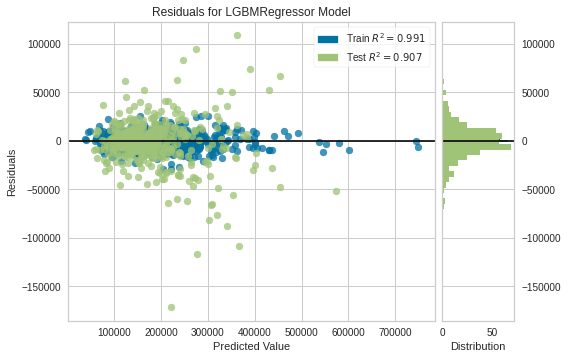

In [18]:
plot_model(tuned_GBM)

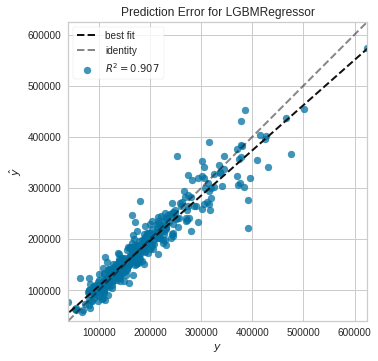

In [19]:
plot_model(tuned_GBM, plot='error')

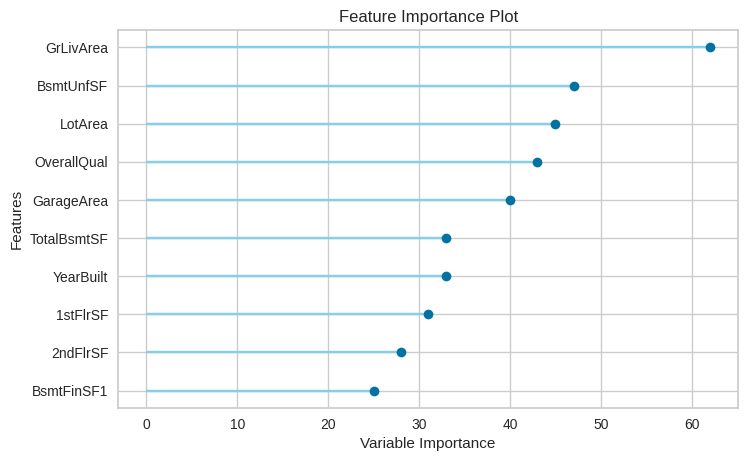

In [20]:
plot_model(tuned_GBM, plot='feature')

In [21]:
predict_model(tuned_GBM)
predict_model(tuned_GBR)
predict_model(tuned_RF)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,16070.7019,6.137490e+08,24773.9579,0.9075,0.1248,0.0899


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,18179.0957,7.202405e+08,26837.2963,0.8914,0.1426,0.1039


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Random Forest Regressor,17472.7729,7.125230e+08,26693.1257,0.8926,0.1394,0.0995


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,...,GarageQual_TA,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y,PoolQC_Ex,PoolQC_Fa,PoolQC_Gd,PoolQC_not_available,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_not_available,MiscFeature_Gar2,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,MiscFeature_not_available,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SalePrice,Label
0,160.0,21.0,1680.0,6.0,3.0,1971.0,1971.0,604.0,358.0,0.0,125.0,483.0,483.0,504.0,0.0,987.0,0.0,0.0,1.0,1.0,2.0,1.0,5.0,0.0,1971.00000,1.0,264.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,2008.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,89500.0,95751.353066
1,20.0,79.0,9416.0,7.0,5.0,2007.0,2007.0,205.0,1126.0,0.0,600.0,1726.0,1726.0,0.0,0.0,1726.0,1.0,0.0,2.0,0.0,3.0,1.0,8.0,1.0,2007.00000,3.0,786.0,171.0,138.0,0.0,0.0,266.0,0.0,0.0,9.0,2007.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,311872.0,255808.502402
2,20.0,60.0,7200.0,5.0,7.0,1950.0,1950.0,0.0,534.0,96.0,246.0,876.0,988.0,0.0,0.0,988.0,0.0,0.0,1.0,0.0,3.0,1.0,6.0,0.0,1950.00000,1.0,276.0,0.0,80.0,0.0,0.0,0.0,0.0,0.0,5.0,2007.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,119000.0,124454.787440
3,20.0,76.0,9591.0,8.0,5.0,2004.0,2005.0,262.0,1088.0,0.0,625.0,1713.0,1713.0,0.0,0.0,1713.0,1.0,0.0,2.0,0.0,3.0,1.0,7.0,1.0,2004.00000,3.0,856.0,0.0,26.0,0.0,0.0,170.0,0.0,0.0,1.0,2009.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,274900.0,283162.667373
4,20.0,74.0,5868.0,5.0,7.0,1956.0,2000.0,0.0,248.0,240.0,448.0,936.0,936.0,0.0,0.0,936.0,1.0,0.0,1.0,0.0,2.0,1.0,4.0,0.0,1956.00000,1.0,308.0,0.0,0.0,80.0,0.0,160.0,0.0,0.0,5.0,2010.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,129000.0,121540.526713
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434,20.0,70.0,10500.0,4.0,5.0,1971.0,1971.0,0.0,432.0,0.0,432.0,864.0,864.0,0.0,0.0,864.0,0.0,0.0,1.0,0.0,3.0,1.0,5.0,1.0,1978.06958,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,2010.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,115000.0,116729.945413
435,30.0,60.0,6324.0,4.0,6.0,1927.0,1950.0,0.0,0.0,0.0,520.0,520.0,520.0,0.0,0.0,520.0,0.0,0.0,1.0,0.0,1.0,1.0,4.0,0.0,1920.00000,1.0,240.0,49.0,0.0,87.0,0.0,0.0,0.0,0.0,5.0,2008.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,

In [22]:
final_CBR = finalize_model(tuned_GBM)

In [23]:
df_test = pd.read_csv('test.csv')
test_predictions = predict_model(final_CBR, data=df_test)
submission = test_predictions[['Id', 'Label']]
submission.columns = ['Id', 'SalePrice']
submission.to_csv('submission.csv', index=False)